# Visualization Gallery — Professional (Fixed, EN)
A consistent, professional gallery for **Seaborn**, **Matplotlib**, **pandas** (scatter matrix), and **missingno**.

- Color family: **white / red / blue** with friendly, powerful variations.  
- **All plots use the same size** for visual consistency.  
- Fixed: removed walrus operator (`:=`) — safe for all Python/Jupyter versions.

> Global configuration applies to all plots.  


## Global Configuration

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
# %load_ext autoreload
# %autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
import missingno as msno
import janitor  # optional

# --------------------------- Color Theme --------------------------------------
THEME = {
    "WHITE":      "#FFFFFF",
    "SKY_BLUE":   "#6BAED6",
    "ROYAL_BLUE": "#1F77B4",
    "NAVY":       "#0B1F3B",
    "SOFT_RED":   "#EF5350",
    "RED":        "#D62728",
    "CRIMSON":    "#C62828",
    "GRAPHITE":   "#222222"
}

# Seaborn theme with a friendly but assertive palette
sns.set_theme(
    style="whitegrid",
    palette=[THEME["ROYAL_BLUE"], THEME["CRIMSON"], THEME["SKY_BLUE"], THEME["SOFT_RED"]]
)

# ----------------------- Global Figure Size -----------------------------------
# All plots will share this figure size for consistency.
FIG_SIZE = (8, 5)
plt.rcParams["figure.figsize"] = FIG_SIZE

plt.rcParams.update({
    "figure.facecolor": THEME["WHITE"],
    "axes.facecolor": THEME["WHITE"],
    "text.color": THEME["GRAPHITE"],
    "axes.labelcolor": THEME["GRAPHITE"],
    "axes.edgecolor": THEME["GRAPHITE"],
    "xtick.color": THEME["GRAPHITE"],
    "ytick.color": THEME["GRAPHITE"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "grid.color": "#E5E5E5",
})

def banner(title: str):
    print("\n=== " + title + " ===\n" + "-"* (len(title) + 8))

# Custom diverging colormap
CMAP_RWB = LinearSegmentedColormap.from_list(
    "rwb_power",
    [THEME["CRIMSON"], THEME["WHITE"], THEME["ROYAL_BLUE"]]
)


## Demo Data

In [3]:
rng = np.random.default_rng(42)
n = 120
x = np.arange(n)
trend = 0.2 * x + 5
noise = rng.normal(0, 5, size=n)
y = trend + noise

category = rng.choice(list("ABC"), size=n, replace=True)
row_group = rng.choice(["R1", "R2"], size=n, replace=True)
col_group = rng.choice(["C1", "C2"], size=n, replace=True)

z1 = rng.normal(50, 10, size=n)
z2 = 0.5 * z1 + rng.normal(0, 5, size=n)
z3 = rng.normal(0, 1, size=n).cumsum()

df = pd.DataFrame({
    "x": x,
    "y": y,
    "category": category,
    "row_group": row_group,
    "col_group": col_group,
    "z1": z1,
    "z2": z2,
    "z3": z3
})

# Inject ~10% NaNs in y and z2 to demo missingness
miss1 = rng.choice(n, size=int(0.1*n), replace=False)
miss2 = rng.choice(n, size=int(0.1*n), replace=False)
df.loc[miss1, "y"]  = np.nan
df.loc[miss2, "z2"] = np.nan

df.head()


,x,y,category,row_group,col_group,z1,z2,z3
0,0,6.523585,B,R1,C1,47.480226,16.329186,-0.361770
1,1,0.000079,A,R2,C1,51.525625,14.094732,-1.302893
2,2,NaN,C,R1,C1,64.714920,28.966138,-1.751457
3,3,10.302824,B,R1,C2,24.333416,15.913877,-1.299123
4,4,-3.955176,C,R1,C2,47.631497,22.391328,-2.864882


## Seaborn


=== Line • Seaborn ===
----------------------


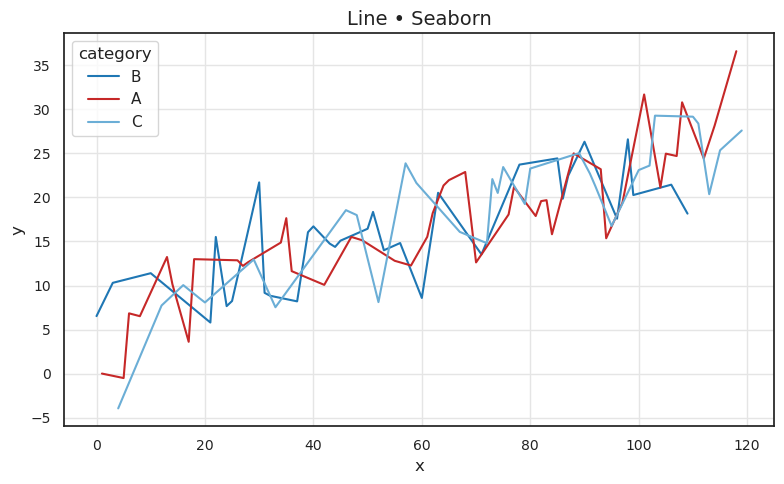

In [4]:
# Line • Seaborn
banner("Line • Seaborn")
sns.lineplot(data=df, x="x", y="y", hue="category")
plt.title("Line • Seaborn"); plt.xlabel("x"); plt.ylabel("y"); plt.tight_layout(); plt.show()



=== Bar • Seaborn ===
---------------------


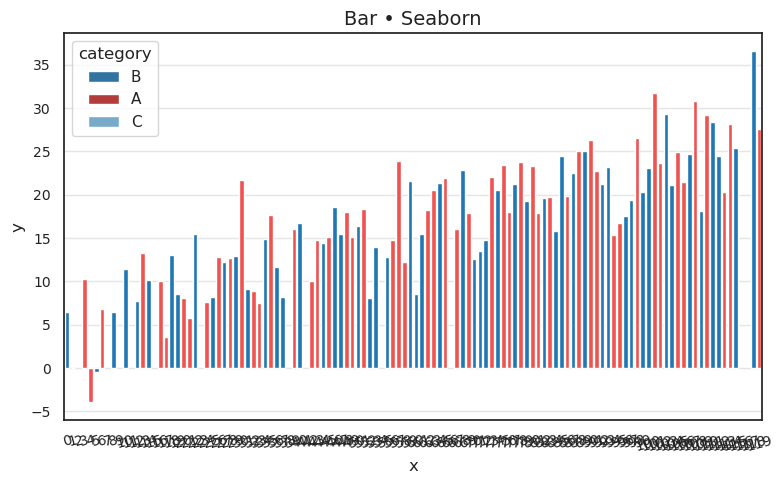

In [5]:
# Bar • Seaborn
banner("Bar • Seaborn")
ax = sns.barplot(data=df, x="x", y="y", hue="category")
for i, p in enumerate(ax.patches):
    p.set_facecolor(THEME["ROYAL_BLUE"] if i % 2 == 0 else THEME["SOFT_RED"])
plt.title("Bar • Seaborn"); plt.xlabel("x"); plt.ylabel("y"); plt.xticks(rotation=15); plt.tight_layout(); plt.show()



=== Scatter • Seaborn ===
-------------------------


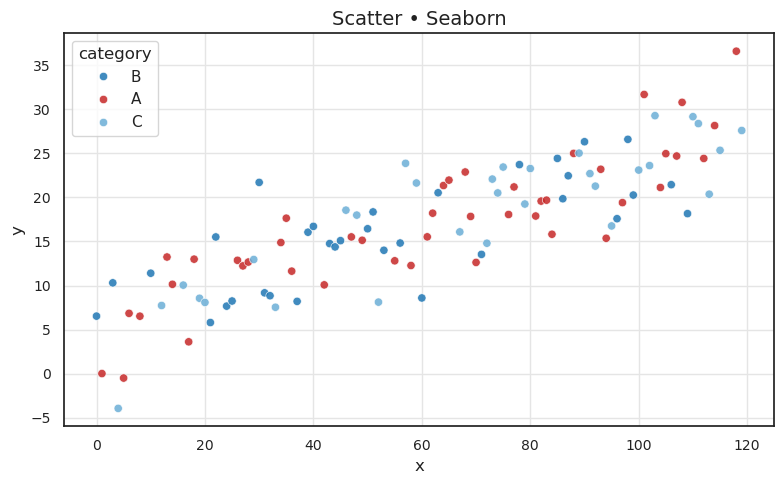

In [6]:
# Scatter • Seaborn
banner("Scatter • Seaborn")
sns.scatterplot(data=df, x="x", y="y", hue="category", alpha=0.85)
plt.title("Scatter • Seaborn"); plt.xlabel("x"); plt.ylabel("y"); plt.tight_layout(); plt.show()



=== Histogram • Seaborn ===
---------------------------


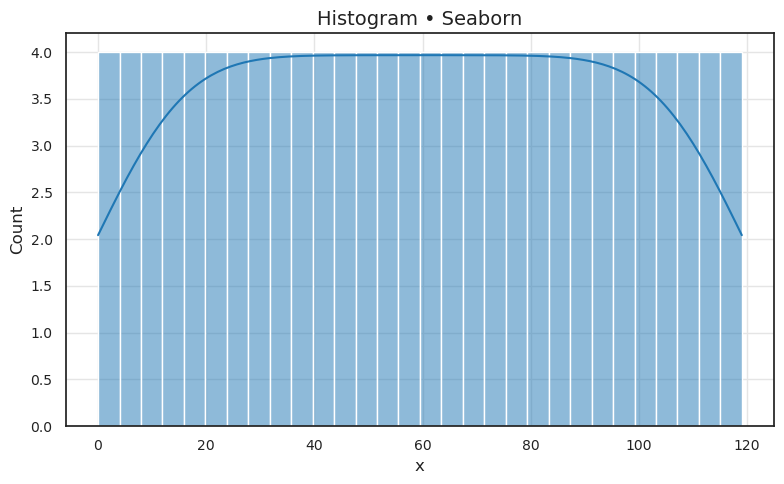

In [7]:
# Histogram • Seaborn
banner("Histogram • Seaborn")
sns.histplot(data=df, x="x", bins=30, kde=True, color=THEME["ROYAL_BLUE"])
plt.title("Histogram • Seaborn"); plt.xlabel("x"); plt.ylabel("Count"); plt.tight_layout(); plt.show()



=== Box • Seaborn ===
---------------------


/tmp/ipykernel_15642/2715769793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="category", y="y", palette=[THEME["ROYAL_BLUE"], THEME["CRIMSON"]])
/tmp/ipykernel_15642/2715769793.py:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x="category", y="y", palette=[THEME["ROYAL_BLUE"], THEME["CRIMSON"]])


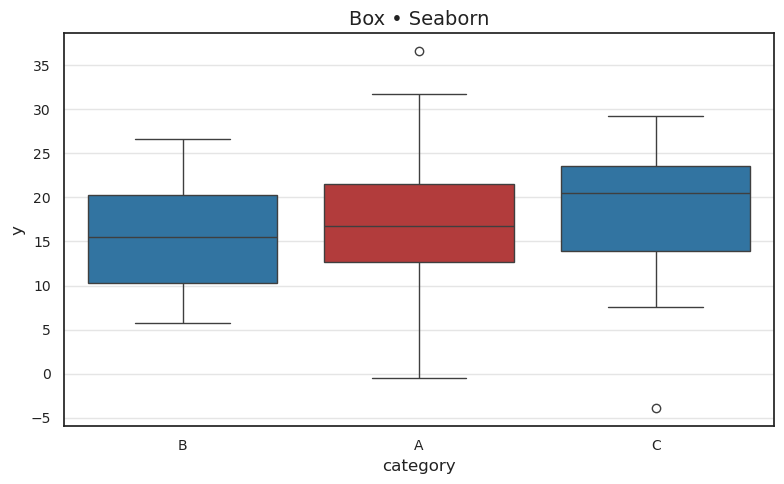

In [8]:
# Box • Seaborn
banner("Box • Seaborn")
sns.boxplot(data=df, x="category", y="y", palette=[THEME["ROYAL_BLUE"], THEME["CRIMSON"]])
plt.title("Box • Seaborn"); plt.xlabel("category"); plt.ylabel("y"); plt.tight_layout(); plt.show()



=== Correlation Heatmap • Seaborn ===
-------------------------------------


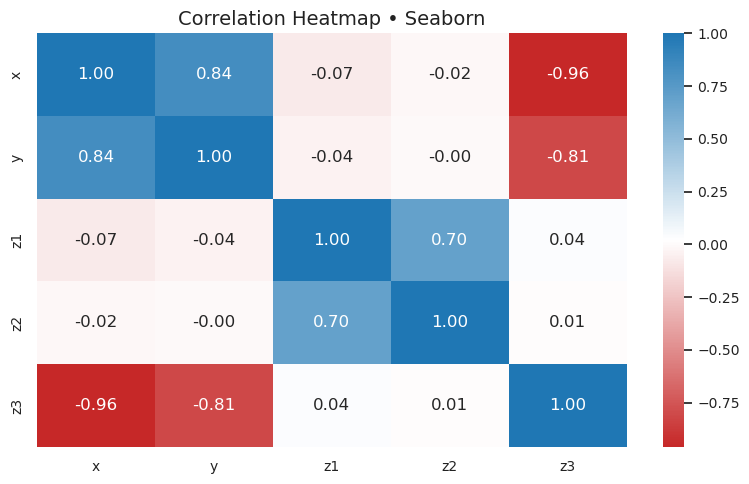

In [9]:
# Correlation Heatmap • Seaborn
banner("Correlation Heatmap • Seaborn")
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=CMAP_RWB, fmt=".2f")
plt.title("Correlation Heatmap • Seaborn"); plt.tight_layout(); plt.show()


## Matplotlib


=== Correlation Heatmap • Matplotlib ===
----------------------------------------


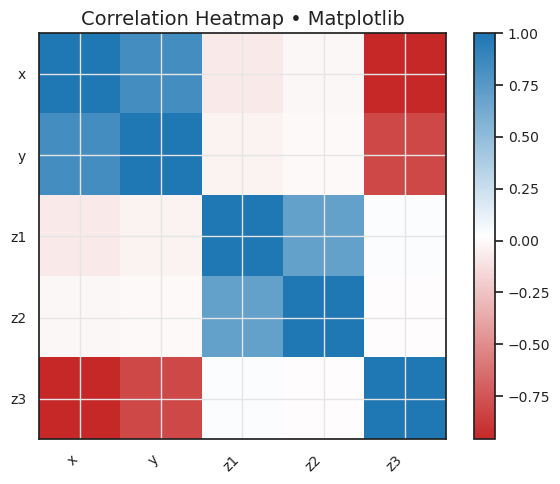

In [10]:
# Correlation Heatmap • Matplotlib (fixed)
banner("Correlation Heatmap • Matplotlib")
corr_df = df.corr(numeric_only=True)
im = plt.imshow(corr_df.values, interpolation="nearest", cmap=CMAP_RWB)
plt.colorbar(im, fraction=0.046, pad=0.04)
ticks = range(len(corr_df.columns)); labels = corr_df.columns
plt.xticks(ticks, labels, rotation=45, ha="right"); plt.yticks(ticks, labels)
plt.title("Correlation Heatmap • Matplotlib"); plt.tight_layout(); plt.show()


## pandas — Scatter Matrix


=== Scatter Matrix • pandas ===
-------------------------------


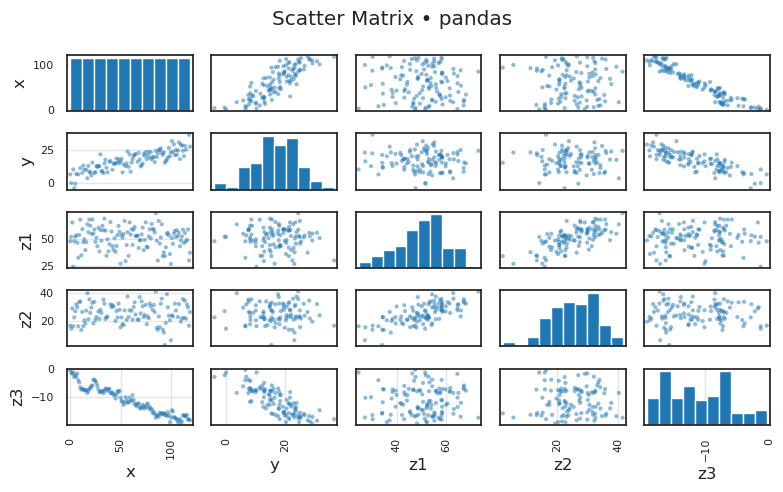

In [11]:
banner("Scatter Matrix • pandas")
axarr = scatter_matrix(df.select_dtypes(include=[np.number]), figsize=FIG_SIZE, diagonal="hist")
plt.gcf().suptitle("Scatter Matrix • pandas")
plt.tight_layout(); plt.show()


## Missing Data — missingno


=== Missing Matrix • msno ===
-----------------------------


/tmp/ipykernel_15642/3683614474.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.title("Missing Matrix • msno"); plt.tight_layout(); plt.show()


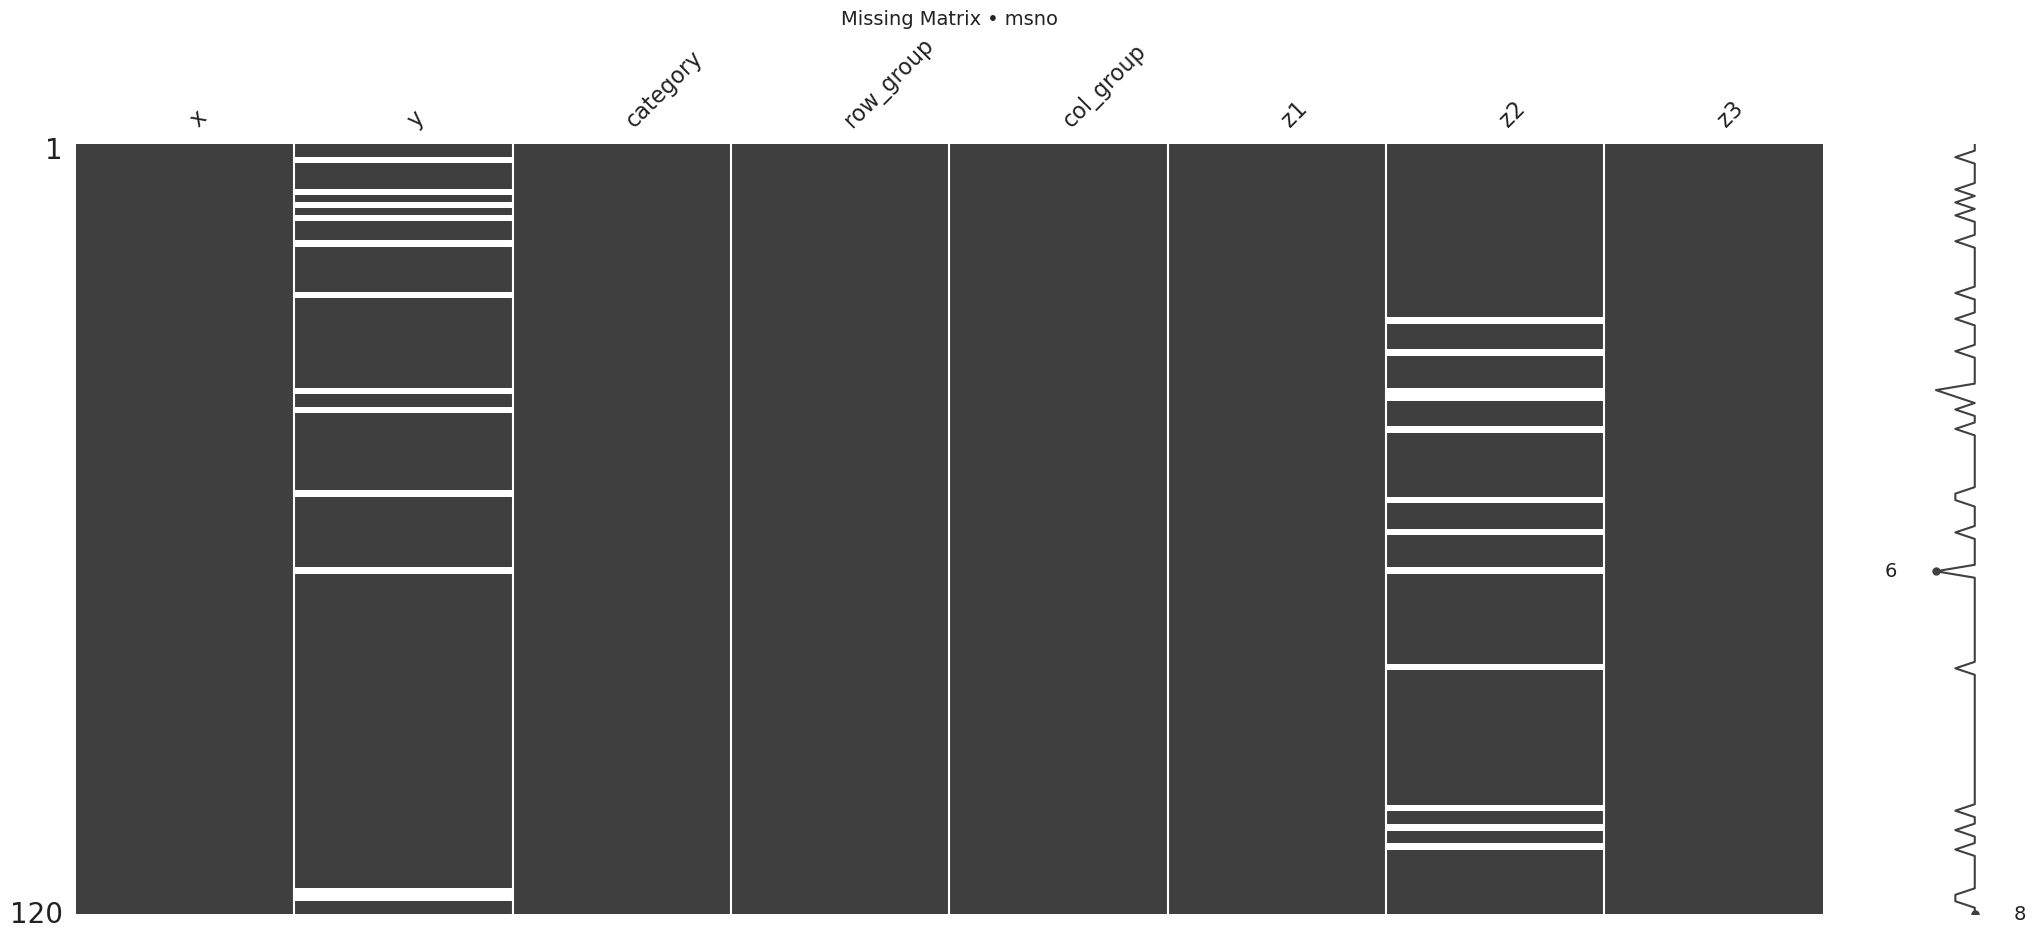

In [12]:
banner("Missing Matrix • msno")
msno.matrix(df)
plt.title("Missing Matrix • msno"); plt.tight_layout(); plt.show()
